## Importing resources

In [13]:
import numpy as np
import pandas as pd
import pmomstuff4 as pm
import iscastuff as isca
import matplotlib.pyplot as plt
%matplotlib inline

## Extracting the single-scattering data 

In [14]:
# Specifying the root name (and some points for QC)
#rootname = '/Users/Steven/Documents/iceHabitSSPs/solid_column 16-99/Rough000/'
#rootname = '/Users/Steven/Documents/iceHabitSSPs/Rough000_solid_column 0-15/'
#rootname = '/Users/Steven/Documents/iceHabitSSPs/plate 16-99/Rough000/'
#rootname = '/Users/Steven/Documents/iceHabitSSPs/Rough000_plate 0-15/'

#rootname = '/Users/Steven/Documents/iceHabitSSPs/Rough000_plate 0-99/'
#rootname = '/Users/Steven/Documents/iceHabitSSPs/Rough000_solid_column 0-99/'
#rootname = '/Users/Steven/Documents/iceHabitSSPs/Rough050_plate 0-99/'
#rootname = '/Users/Steven/Documents/iceHabitSSPs/Rough050_solid_column 0-99/'
#rootname = '/Users/Steven/Documents/iceHabitSSPs/Rough000_hollow_bullet_rosette 0-99/'
#rootname = '/Users/Steven/Documents/iceHabitSSPs/Rough000_column_8elements 0-99/'
rootname = '/Users/Steven/Documents/iceHabitSSPs/Rough000_plate_10elements 0-99/'

In [15]:
# Append to generate input and output data file names
iscafilename = rootname+'isca.dat'; print (iscafilename)
p11filename = rootname+'P11.dat'; print(p11filename)
ncfilename = rootname+'pmom.nc'; print(ncfilename)

/Users/Steven/Documents/iceHabitSSPs/Rough000_plate_10elements 0-99/isca.dat
/Users/Steven/Documents/iceHabitSSPs/Rough000_plate_10elements 0-99/P11.dat
/Users/Steven/Documents/iceHabitSSPs/Rough000_plate_10elements 0-99/pmom.nc


In [16]:
# This is the maximum reff we want to compute
reffmax = 125.0

In [17]:
# Load in the isca data
ppa, p11, \
wnum_mesh, reff_mesh, w0_mesh, qext_mesh, asym_mesh, \
wnum_list, reff_list, maxdim_list, volume_list, parea_list, = \
isca.loadiscp(iscafilename, p11filename)

This is a 0-99 um file


## This section is for quality control

In [18]:
# This selects certain combinations of wavenumber, scattering angle, and reff for QC
if wnum_list[0] > 50000:
    iwnum_QC = 344; ippa_QC = 310; ireff_QC = 47
else:
    iwnum_QC = 0; ippa_QC = 310; ireff_QC = 100
print 'wavenumber to test:', wnum_list[iwnum_QC], '(wavelength', 1e4/wnum_list[iwnum_QC], ')'
print 'angle to test:', ppa[ippa_QC]
print 'size to test', reff_list[ireff_QC]    

wavenumber to test: [ 1000.] (wavelength [ 10.] )
angle to test: 10.0
size to test [ 8.98633778]


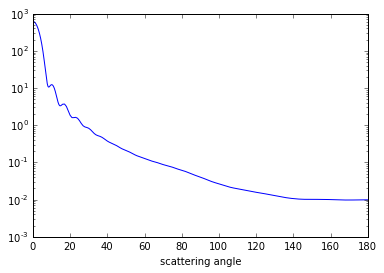

In [19]:
# Graph P11(theta)
plt.semilogy(ppa,p11[:,iwnum_QC,ireff_QC])
plt.xlabel('scattering angle')

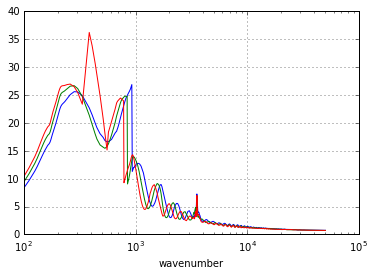

In [20]:
# Graph P11(wavenumber)
plt.semilogx(wnum_list,p11[ippa_QC,:,ireff_QC])
plt.semilogx(wnum_list,p11[ippa_QC,:,ireff_QC+1])
plt.semilogx(wnum_list,p11[ippa_QC,:,ireff_QC+2])
plt.xlabel('wavenumber')
plt.grid('on')

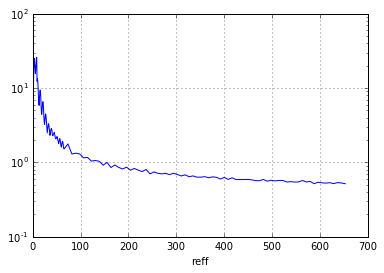

In [21]:
# Graph P11(reff)
plt.semilogy(reff_list,p11[ippa_QC,iwnum_QC,:])
plt.xlabel('reff')
plt.grid()

## Converting to moments and saving to disk

In [22]:
# Do the conversion to moments
pmomarray, Npmomarray = pm.ssp2pmom(p11,reff_list,reffmax,wnum_list,ppa)

('Nreff=', 189)
('Niors=', 445)
('Nang=', 498)
('reff = ', array([ 0.13071037]))
('reff = ', array([ 0.19606556]))
('reff = ', array([ 0.26142074]))
('reff = ', array([ 0.32677593]))
('reff = ', array([ 0.39213111]))
('reff = ', array([ 0.4574863]))
('reff = ', array([ 0.52284148]))
('reff = ', array([ 0.58819666]))
('reff = ', array([ 0.65355185]))
('reff = ', array([ 0.81693982]))
('reff = ', array([ 0.98032777]))
('reff = ', array([ 1.14371574]))
('reff = ', array([ 1.30710373]))
('reff = ', array([ 1.47049164]))
('reff = ', array([ 1.63387956]))
('reff = ', array([ 1.79726755]))
('reff = ', array([ 1.96065556]))
('reff = ', array([ 2.12404349]))
('reff = ', array([ 2.28743151]))
('reff = ', array([ 2.45081943]))
('reff = ', array([ 2.61420739]))
('reff = ', array([ 2.77759537]))
('reff = ', array([ 2.94098326]))
('reff = ', array([ 3.10437124]))
('reff = ', array([ 3.26775929]))
('reff = ', array([ 3.43114714]))
('reff = ', array([ 3.59453519]))
('reff = ', array([ 3.75792313]))
('

In [23]:
# Save the moments as a netcdf file
pm.pmomsave2(\
ncfilename, \
Npmomarray, pmomarray, \
wnum_mesh, reff_mesh, w0_mesh, qext_mesh, asym_mesh, \
wnum_list, reff_list, maxdim_list, volume_list, parea_list)

## More quality control

62


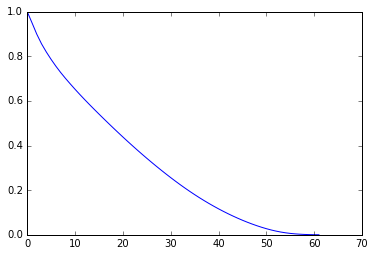

In [24]:
Nptest = Npmomarray[ireff_QC,iwnum_QC]; print Nptest
ptest = pmomarray[ireff_QC,iwnum_QC,0:Nptest]; #print ptest
itest = range(0,Nptest); #print itest
plt.plot(itest,ptest)